In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Read in some simulated images

In [5]:
#define file names
fdata_F277W = "F277W_cutout.fits"
fdata_F356W = "F356W_cutout.fits"
fdata_f444W = "F444W_cutout.fits"

#read in data
hdu_2 = fits.open(fdata_F277W)
hdu_3 = fits.open(fdata_F356W)
hdu_4 = fits.open(fdata_f444W)

#get the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

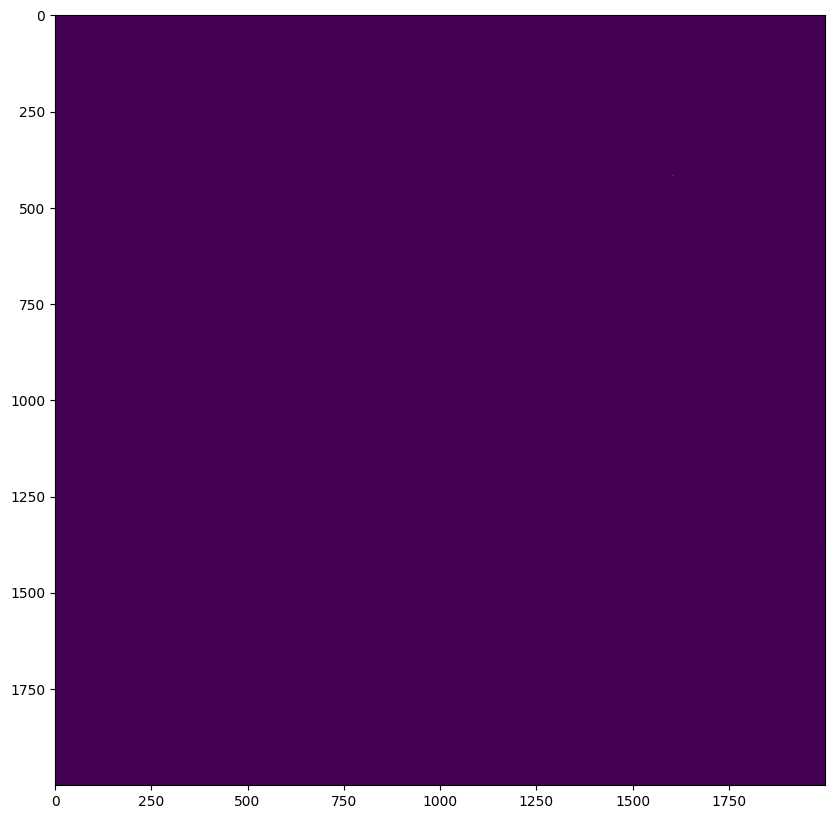

In [6]:
### First, just do a linear scaling
f = plt.figure(figsize=(10,10))
plt.imshow(data_2)

# Rescale the data to see faint object

In [7]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m*100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

# Function to plot the rescaled data

In [8]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

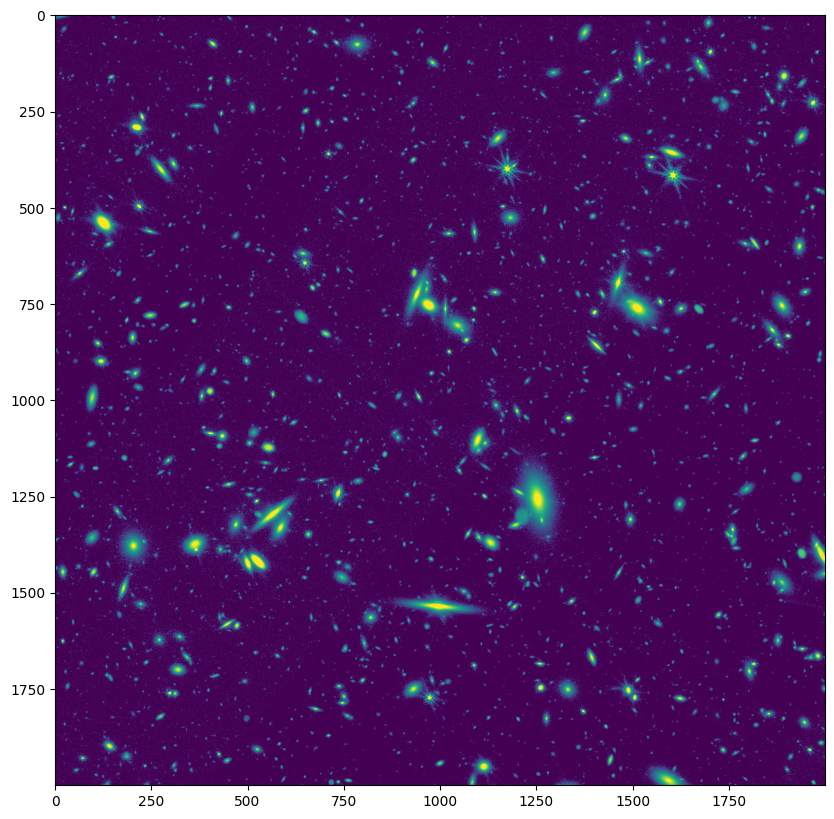

In [9]:
fits_quicklook(data_2)

# Make 3-color image from data

In [10]:
# Use recaled images
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

# Limit the data to be between the min and max values in the rescaling

In [12]:
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2min] = d2max
data_3_res[data_3_res<d2min] = d3min
data_3_res[data_3_res>d2min] = d3max
data_4_res[data_4_res<d2min] = d4min
data_4_res[data_4_res>d2min] = d4max

Create an RGB image that is nx x ny x 3 in size, where each image is either R,G,B

In [14]:
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


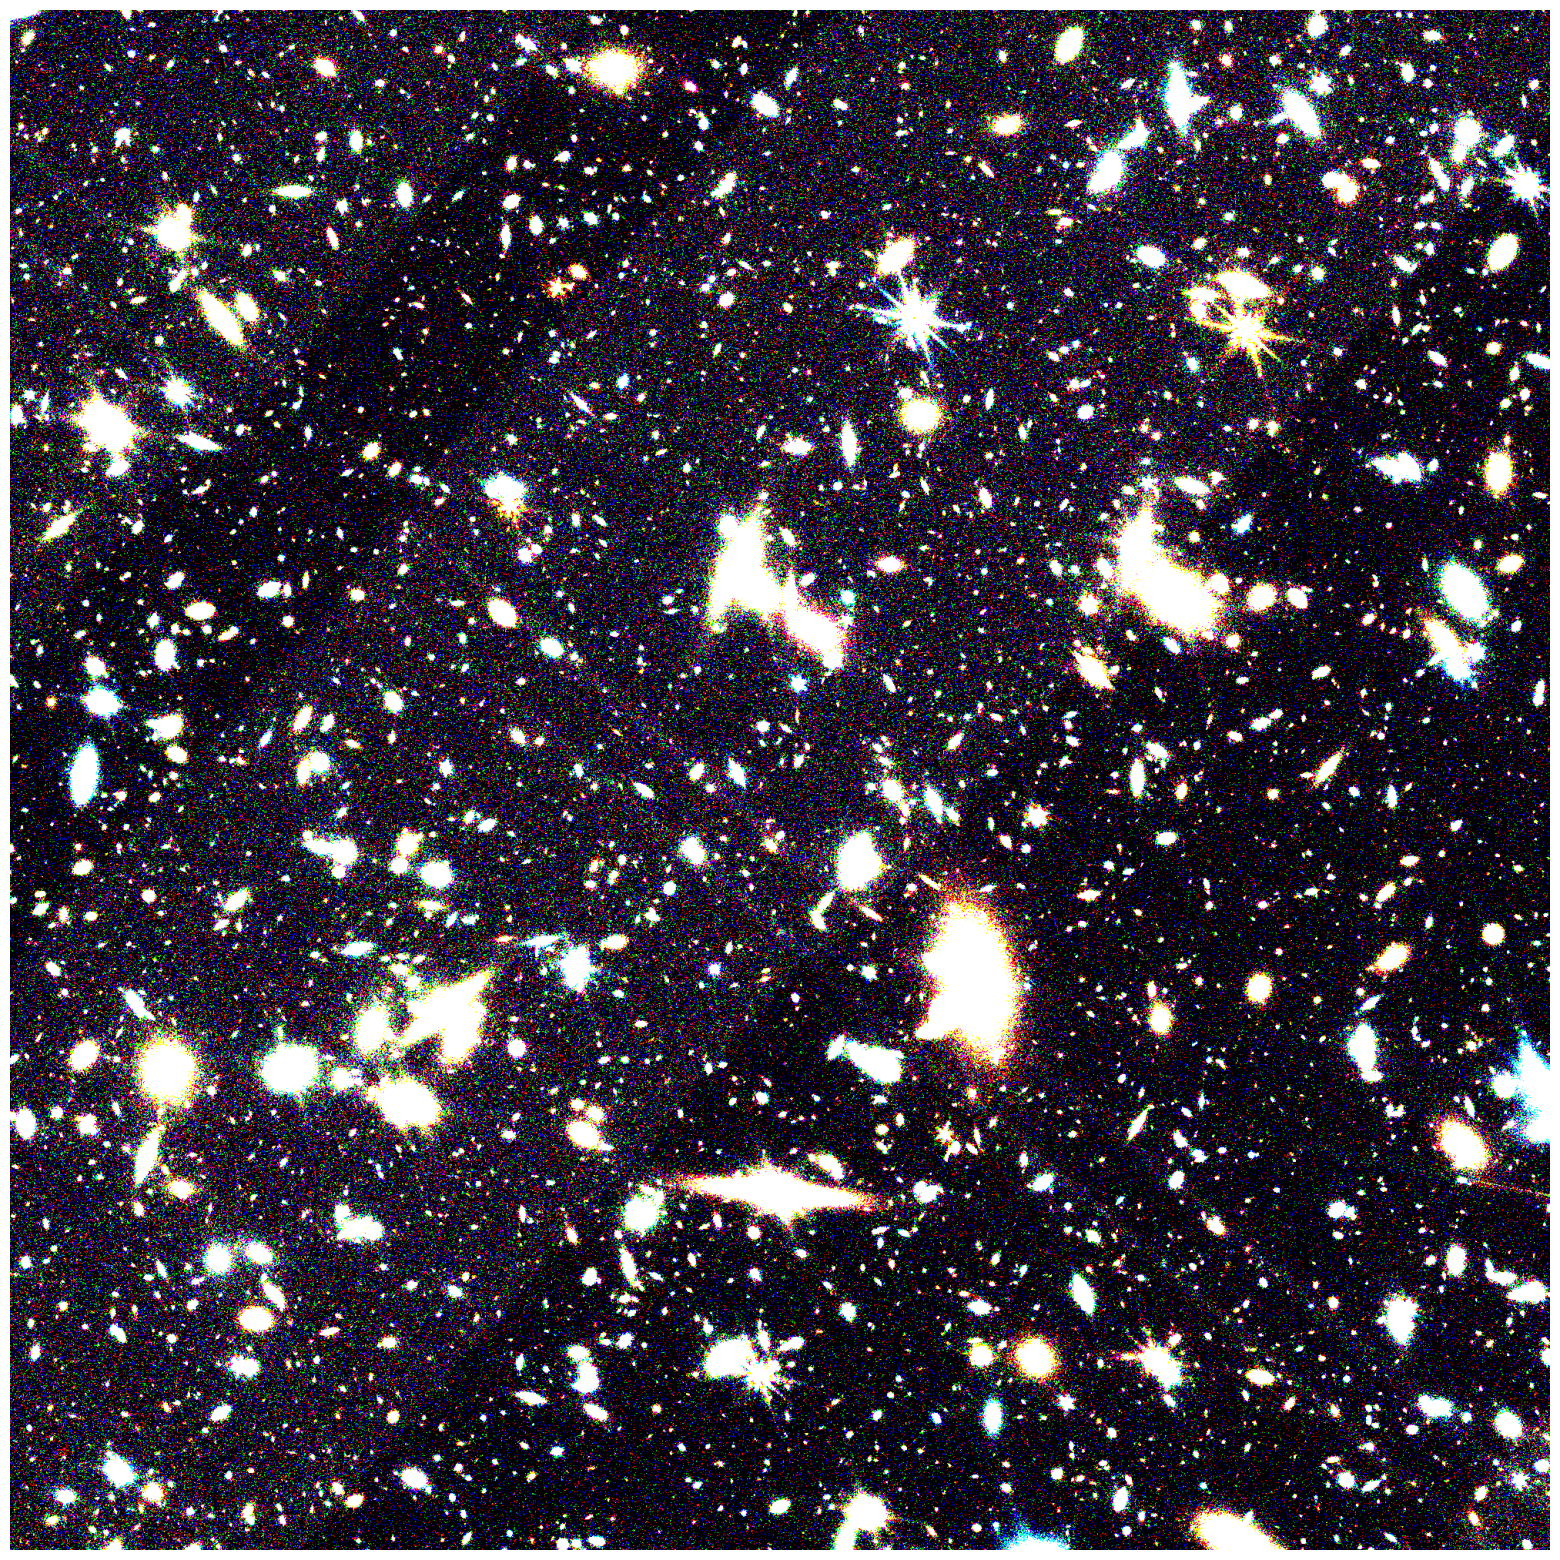

In [25]:
#Plot and save
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('jwst_image.png',bbox_inches='tight',pad_inches=0,dpi=600)